Exploração dos dados do dataset "DEMO_PHQ.csv"

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Carregando dados demográficos e do PHQ
dataset_path = '../data/raw/'
demo_phq_dataset_name = 'DEMO_PHQ.csv'

demo_phq = pd.read_csv(f"{dataset_path}{demo_phq_dataset_name}", sep=',')

In [2]:
# Visualizando informações basicas do dataset
print("demo_phq.shape: ", {demo_phq.shape})

print("\ndemo_phq.info():")
print(demo_phq.info())

demo_phq.shape:  {(5334, 15)}

demo_phq.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB
None


<AxesSubplot: >

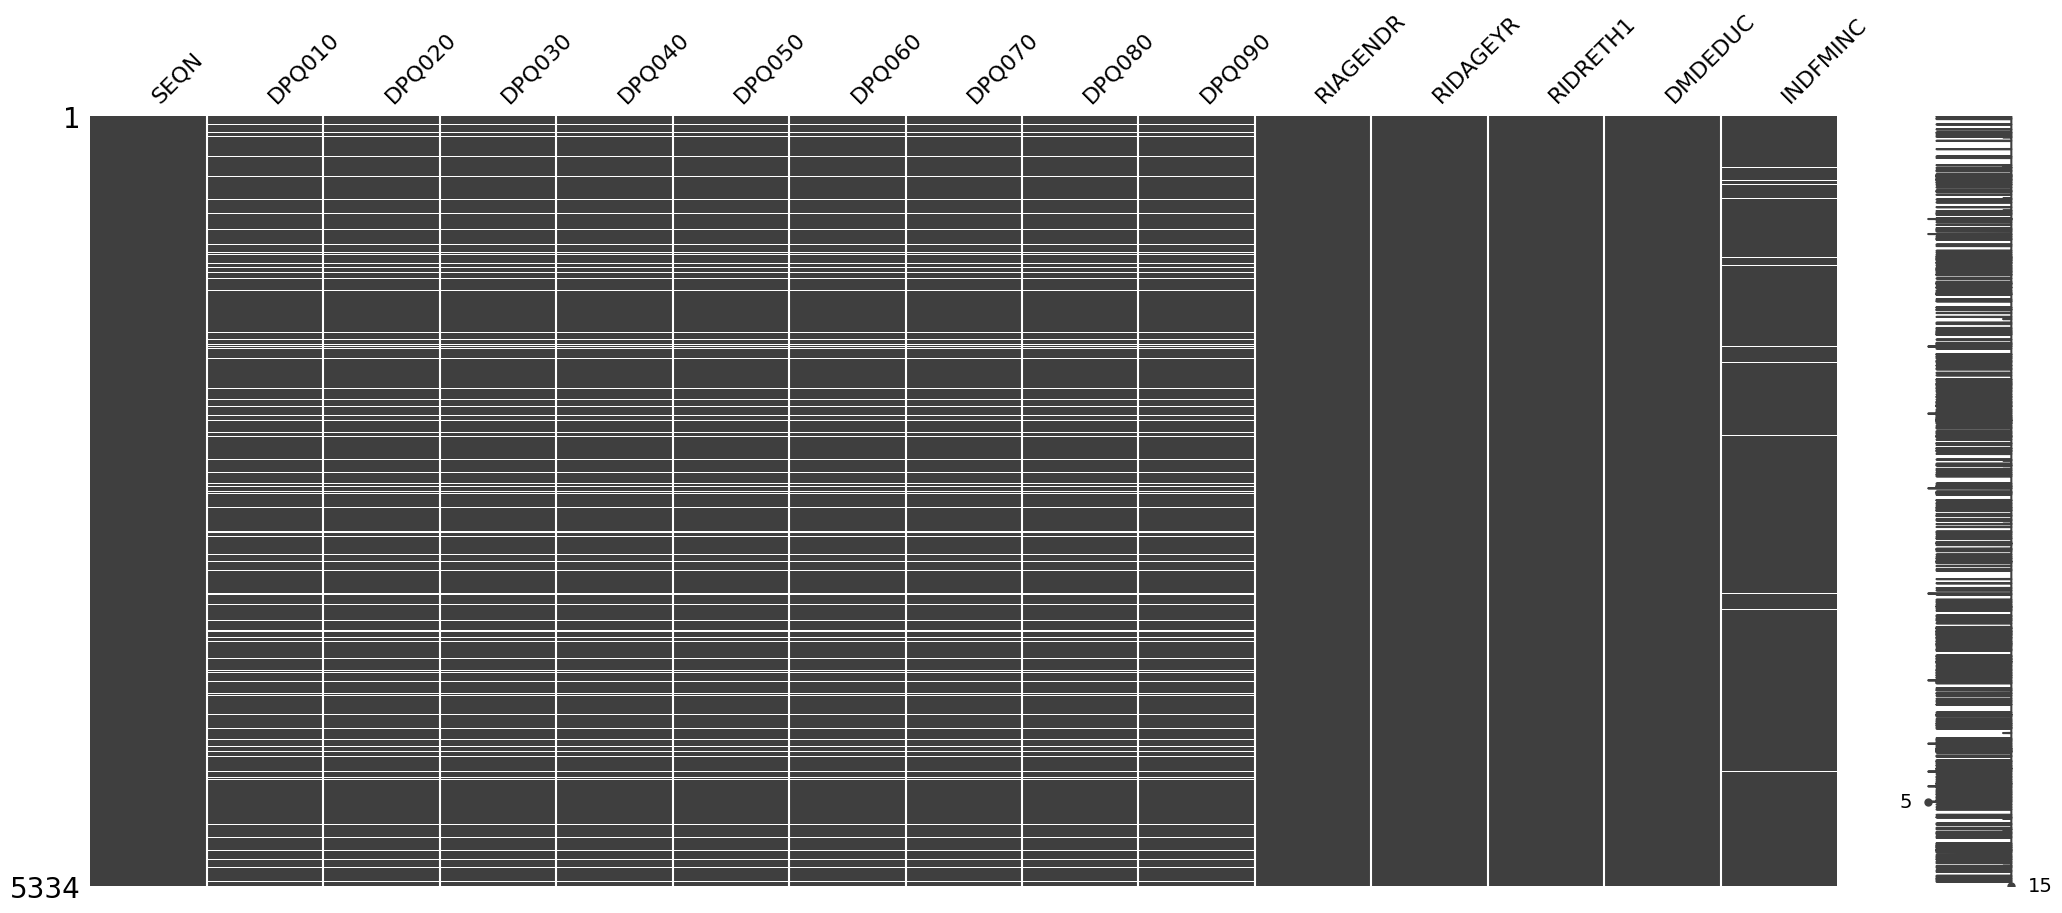

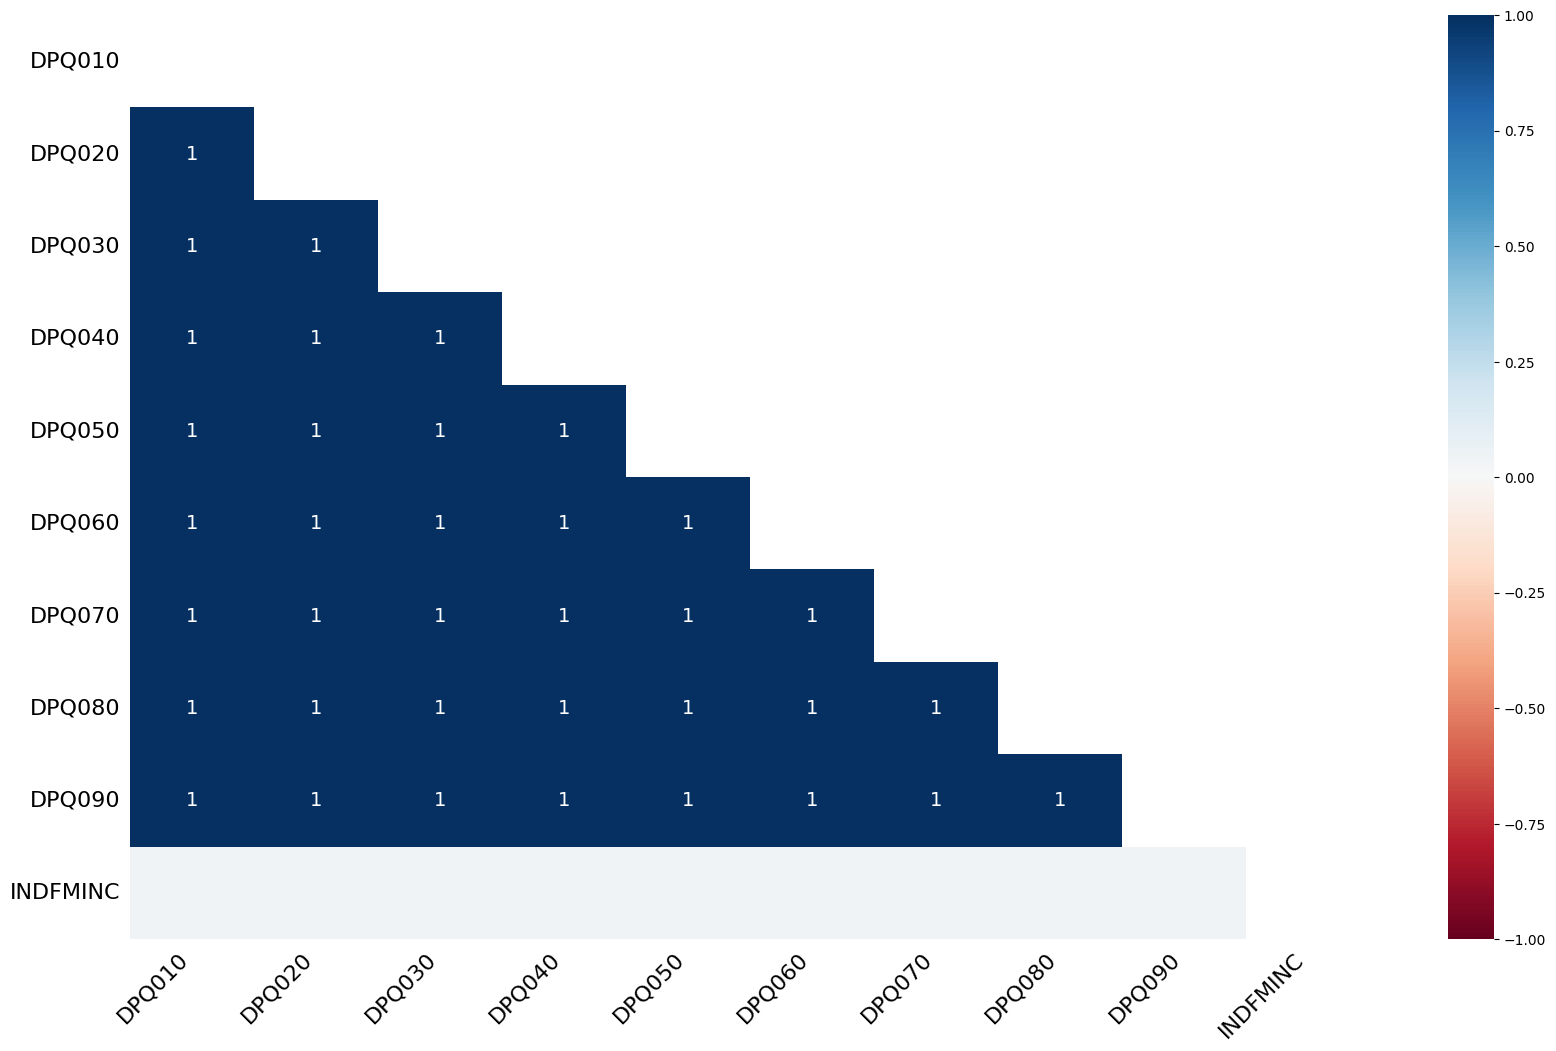

In [3]:
# Verificando ocorrência de valores ausentes
msno.matrix(demo_phq)
msno.heatmap(demo_phq)

In [4]:
# Visualizando estatísticas das respostas do PHQ
phq_cols = [
    "DPQ010", "DPQ020", "DPQ030", "DPQ040", "DPQ050", 
    "DPQ060", "DPQ070", "DPQ080", "DPQ090", 
]

demo_phq[phq_cols].describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
count,"4,836.00","4,836.00","4,836.00","4,836.00","4,836.00","4,836.00","4,836.00","4,836.00","4,836.00"
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00


In [5]:
# Checando ocorrencias de respostas 7 e 9 no PHQ-9
print(f'Ocorrências de resposta 7: {(demo_phq[phq_cols] == 7.0).sum().sum()}')
print(f'Ocorrências de resposta 9: {(demo_phq[phq_cols] == 9.0).sum().sum()}')

Ocorrências de resposta 7: 0
Ocorrências de resposta 9: 50
